# Homework 2

## Question 1

#### Consider the following 1-d dataset with 5 points $ X = \{-1, 1, 10, -0,5, 0 \} $, on which we are going to perform Gaussian density estimation. For the exercise below, you may use Python for plotting but all the calculations have to be done by hand.

- Compute the Maximum Likelihood Estimate (MLE) of the mean and variance. For the variance, compute both the unbiased and biased
versions. Comment on what you observe. In particular, how does the presence of an outlier aect your estimates.

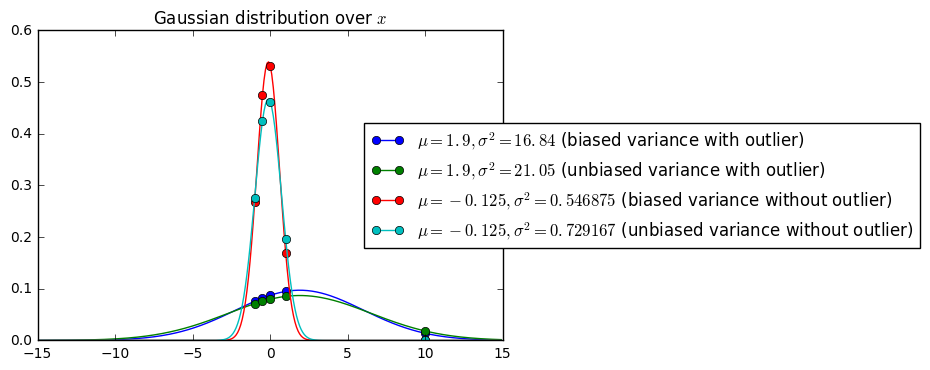

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def gaussian(x, mu, var):
    return (1.0 / np.sqrt(2 * np.pi * var)) * np.exp( - (x - mu)**2 / (2 * var) )

x = [-1, 1, 10, -0.5, 0]
rd = np.arange(-15, 15, 0.1)
l = sorted(set(np.append(rd, x)))
p = np.asarray(l)

plt.title('Gaussian distribution over $ x $')

for mu, var, note in [(1.9, 16.84, 'biased variance with outlier'),
                      (1.9, 21.05, 'unbiased variance with outlier'),
                      (-0.125, 0.546875, 'biased variance without outlier'),
                      (-0.125, 0.729167, 'unbiased variance without outlier')]:
        plt.plot(p, gaussian(p, mu, var), '-o', markevery=[l.index(e) for e in x], label=r'$\mu=' + str(mu) + ', \sigma^{2}=' + str(var) + '$ (' + note + ')')

plt.legend(loc='center', bbox_to_anchor=(1.3, 0.5))

- Assume that you have a $ \mathcal{N}(0, 1) $ prior over the mean parameter and set the standard deviation $ \sigma^{2} = 1 $. Compute the posterior distribution of the mean parameter and plot both the prior and the posterior distributions. Comment on what you observe.

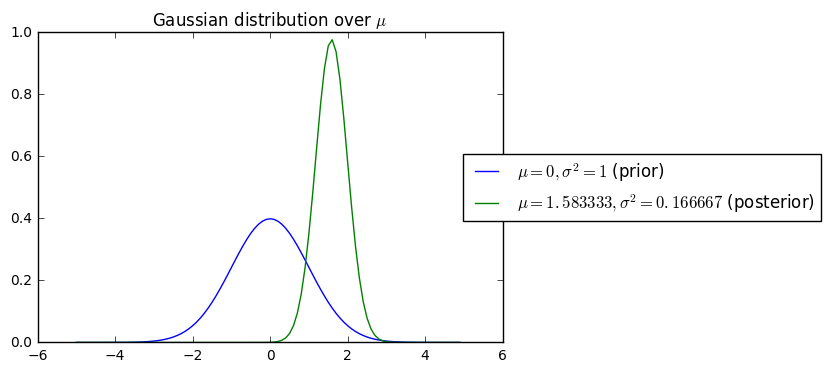

In [2]:
ru = np.arange(-5, 5, 0.1)

plt.title('Gaussian distribution over $ \mu $')

for mu, var, note in [(0, 1, 'prior'),
                      (1.583333, 0.166667, 'posterior')]:
    plt.plot(ru, gaussian(ru, mu, var), label=r'$\mu=' + str(mu) + ', \sigma^{2}=' + str(var) + '$ (' + note + ')')

plt.legend(loc='center', bbox_to_anchor=(1.3, 0.5))

- Now suppose we change the prior over the mean parameter to $ \mathcal{N}(10, 1) $. Compute the new posterior distribution, plot it, and contrast it with what you observed previously.

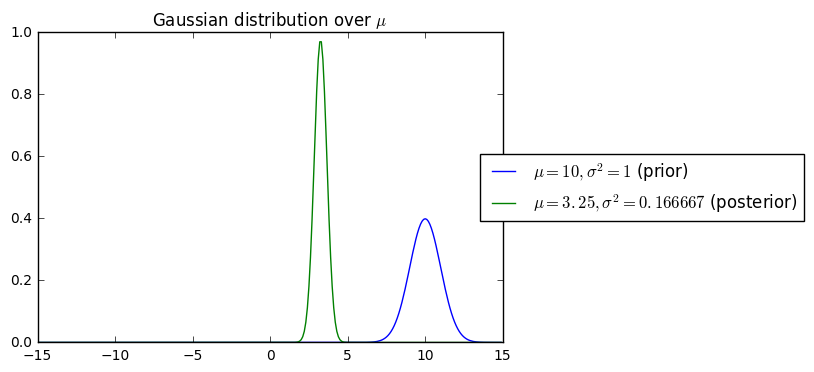

In [3]:
ru = np.arange(-15, 15, 0.1)

plt.title('Gaussian distribution over $ \mu $')

for mu, var, note in [(10, 1, 'prior'),
                      (3.25, 0.166667, 'posterior')]:
    plt.plot(ru, gaussian(ru, mu, var), label=r'$\mu=' + str(mu) + ', \sigma^{2}=' + str(var) + '$ (' + note + ')')

plt.legend(loc='center', bbox_to_anchor=(1.3, 0.5))

- Suppose 2 more data points get added to your dataset: $$ X = \{-1, 1, 10, -0.5, 0, 2, 0.5 \}$$
Using the same $ \mathcal{N}(0, 1) $ prior over the mean parameter, compute and plot the posterior. How does observing new data points afect the posterior?

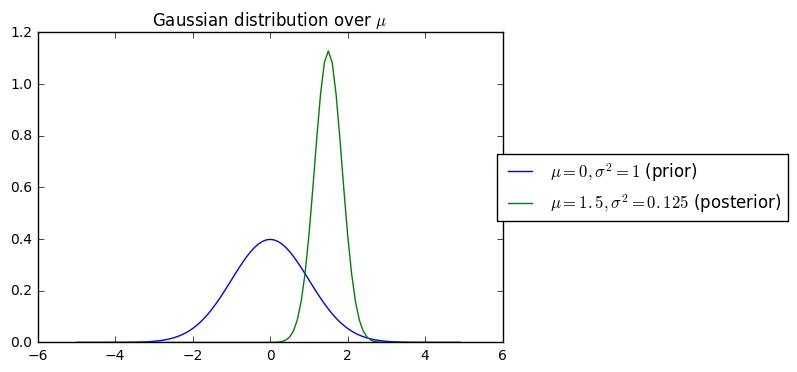

In [4]:
ru = np.arange(-5, 5, 0.1)

plt.title('Gaussian distribution over $ \mu $')

for mu, var, note in [(0, 1, 'prior'),
                      (1.5, 0.125, 'posterior')]:
        plt.plot(ru, gaussian(ru, mu, var), label=r'$\mu=' + str(mu) + ', \sigma^{2}=' + str(var) + '$ (' + note + ')')

plt.legend(loc='center', bbox_to_anchor=(1.3, 0.5))

## Question 2

#### Generate 100 data points as follows: Draw $ x $ uniformly at random from $ \left[-100, 100\right] $. For each $ x $ draw $ t $ from $ \mathcal{N}\{f(x), 1\} $ where $ f(x) = 0.1 + 2x + x^{2} + 3x^{3} $. In order to fit this curve, we will make use of the following probabilistic model:
$$ p(t | x, \textbf{w}, \beta)=\mathcal{N}(t | y(x,\textbf{w}), \beta^{-1}) $$
where $ y(x, \textbf{w})=w_{0} + w_{1}x + w_{2}x^{2} + w_{3}x^{3} $

- Perform MLE estimation of $ \textbf{w} $ and $ \beta $. You may use the $ \displaystyle{optimize} $ module from $ \displaystyle{scipy} $ for this task. Comment on how well $\textbf{w} $ and $ \beta $ match the true parameters used to generate the data. How do the
estimates change when you use 1000 or 10,000 data points for your estimates?

In [5]:
from scipy.optimize import minimize
import random
import numpy as np

NUM_POINTS = 100

# generate x 
xs = []
for _ in range(NUM_POINTS):
    xs.append(random.randint(-100, 100))

# generate t
def fx(x):
    return 0.1 + (2 * x) + (x**2) + (3 * (x**3))

ts = []
for i in range(NUM_POINTS):
    t = np.random.normal(fx(xs[i]), 1, 1)
    ts.append(t[0])

# The first polynomial model
def yxw_1(w, x):
    return w[0] + w[1] * x + w[2] * x**2 + w[3] * x**3

# The second polynomial model
def yxw_2(w, x):
    return w[0] + w[1] * x + w[2] * x**2 + w[3] * x**3 + w[4] * x**4 + w[5] * x**5

# sum-of-squares-error function
def sose(w, xs, ts):
    summ = 0
    for i in range(NUM_POINTS):
        
        # choose yxw_1 or yxw_2 here as a different polynomial model
        summ += (yxw_1(w, xs[i]) - ts[i])**2
    return 1.0 / 2 * summ

# Initial guess of w.
# Choose w0_1 when you use yxw_1 as the polynomial model
# in the sum-of-squares-error function.
# Correspondingly, choose wo_2 when you use yxw_2.
w0_1 = [1, 1, 1, 1]
w0_2 = [1, 1, 1, 1, 1, 1]

res = minimize(sose, w0_1, args=(xs,ts), method='Powell')

if (res.success):
    w_ml = res.x
    print('w_ml = ' + str(w_ml))
    
    beta_ml = 1.0 / (sose(w_ml, xs, ts) * 2 / NUM_POINTS)
    print('beta_ml = ' + str(beta_ml))

w_ml = [ 0.32080888  1.99658931  0.99996139  3.00000068]
beta_ml = 1.06296026969


- Refer to the slides from the class, where we added a prior over $ \textbf{w} $ in order to derive Bayesian linear regression. Assume that we set the hyperparameter $ \alpha = 1 $ and plot the Bayesian estimate of the curve and the uncertainty around the estimate. How well does it match the observed data. How does the estimate change when you use 1000 or 10,000 data points?

The average distance between the mean of the distribution used to generate data and the mean of the predictive distribution is: 0.157483010756
The average distance between the variance of the distribution used to generate data and the variance of the predictive distribution is: 0.03136832302056998


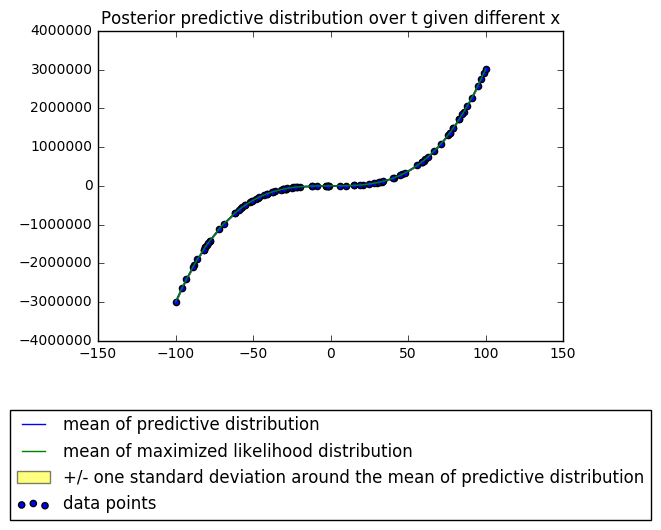

In [6]:
from numpy.matlib import zeros
from numpy.matlib import identity
import numpy as np

# the hyperparameter
alpha = 1

# MLE estimation of variance of likelihood distribution
beta = beta_ml

# the order of the polynomial model
M = 3

def phi(x):
    return np.matrix([[x**i] for i in range(M + 1)])

summ = zeros((M + 1, M + 1))

# NUM_POINTS is defined at the previous program
for i in range(NUM_POINTS):
    p = phi(xs[i])
    summ += p * p.T
s_inv = alpha * identity(M + 1) + beta * summ
s = s_inv.I

sum_phi_t = zeros((M + 1, 1))
for i in range(NUM_POINTS):
    sum_phi_t += phi(xs[i]) * ts[i]

def m(x):
    return (beta * phi(x).T * s * sum_phi_t).item((0, 0))

def s_square(x):
    return (1.0 / beta + phi(x).T * s * phi(x)).item((0, 0))

# plot the mean of predictive distribution
s_xs = sorted(xs)
plt.plot(s_xs, list(map(m, s_xs)), label='mean of predictive distribution')

def md_sigma_n(x):
    return m(x) - np.sqrt(s_square(x))

def md_sigma_p(x):
    return m(x) + np.sqrt(s_square(x))

# plot +/- one standard deviation around the mean of predictive distribution
plt.fill_between(s_xs,
                 list(map(md_sigma_n, s_xs)),
                 list(map(md_sigma_p, s_xs)),
                 facecolor='yellow',
                 alpha=0.5,
                 label='+/- one standard deviation around the mean of predictive distribution')

# plot the data points
plt.scatter(xs, ts, label='data points')

def m_ll(x):
    return (w_ml * phi(x))[0, 0]

# plot the mean of maximized likelihood distribution
plt.plot(s_xs, list(map(m_ll, s_xs)), label='mean of maximized likelihood distribution')

plt.title('Posterior predictive distribution over t given different x')
plt.legend(loc='center', bbox_to_anchor=(0.5, -0.4))


w_t = np.matrix([0.1, 2, 1, 3])
s_mean = 0.0
s_var = 0.0
for i in range(NUM_POINTS):
    tm = (w_t * phi(xs[i]))[0, 0]
    s_mean += abs(tm - m(xs[i]))    
    s_var += abs(1 - s_square(xs[i]))

print("The average distance between the mean of the distribution used to generate data and the mean of the predictive distribution is: " + str(s_mean / NUM_POINTS))
print("The average distance between the variance of the distribution used to generate data and the variance of the predictive distribution is: " + str(s_var / NUM_POINTS))